# Deep Learning Tutorial 04: CNN - Image Augmentation (Ch20)

from Deep Learning with Python by Jason Brownlee (2016)
[e-book](https://machinelearningmastery.com/deep-learning-with-python/)
[요약](http://machinelearningmastery.com/introduction-python-deep-learning-library-keras/)

# Chapter 20 Improve Model Performance With Image Augmentation

## 20.1 Keras Image Augmentation API

## 20.2 Point of Comparison for Image Augmentation
<!--[데이터셋 홈페이지1](http://www.is.umk.pl/projects/datasets.html#Ionosphere), 
[데이터셋 홈페이지2](https://archive.ics.uci.edu/ml/datasets/Ionosphere), 
[데이터 파일](http://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data)

\#Features: 34  
Class: Good/Bad-->

/home/kikim/anaconda2/envs/theano/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


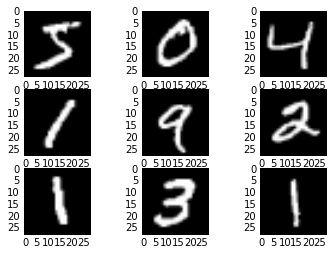

In [2]:
%matplotlib inline

# Plot of images as baseline for comparison
from keras.datasets import mnist
from matplotlib import pyplot
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
    
# show the plot
pyplot.show()

## 20.3 Feature Standardization


In [17]:
# Standardize images across the dataset, mean=0, stdev=1
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

def loadMNIST():
    # load data
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    # reshape to be [samples][channels][width][height]
    X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
    X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
    # convert from int to float
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    
    return X_train, y_train, X_test, y_test

def plotDigits(X_batch):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
        

ERROR! Session/line number was not unique in database. History logging moved to new session 47


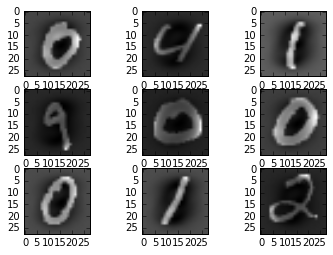

In [19]:
X_train, y_train, X_test, y_test = loadMNIST()

# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    plotDigits(X_batch)
    pyplot.show()
    break

## 20.4 ZCA Whitening

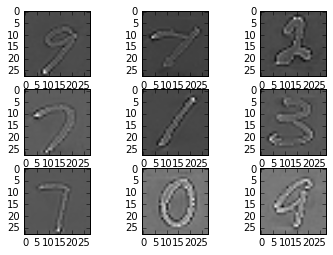

In [21]:
X_train, y_train, X_test, y_test = loadMNIST()

# define data preparation
datagen = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    plotDigits(X_batch)
    pyplot.show()
    break

## 20.5 Random Rotations

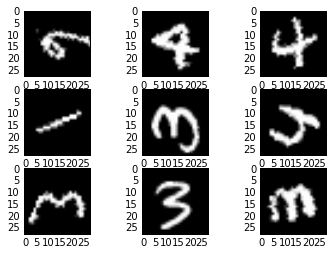

In [24]:
X_train, y_train, X_test, y_test = loadMNIST()

# define data preparation
datagen = ImageDataGenerator(rotation_range=90)

# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    plotDigits(X_batch)
    pyplot.show()
    break

## 20.6 Random Shifts

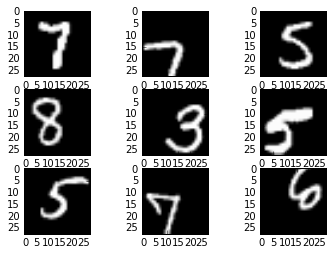

In [26]:
X_train, y_train, X_test, y_test = loadMNIST()

# define data preparation
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)

# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    plotDigits(X_batch)
    pyplot.show()
    break

## 20.7 Random Flips

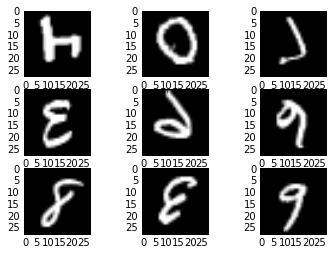

In [27]:
X_train, y_train, X_test, y_test = loadMNIST()

# define data preparation
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    plotDigits(X_batch)
    pyplot.show()
    break

## 20.8 Saving Augmented Images to File

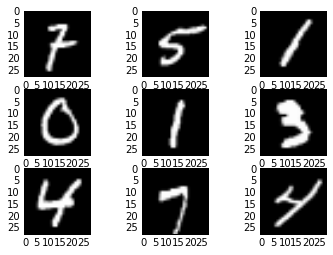

In [32]:
# Save augmented images to file
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import os
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator()
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
#os.makedirs('images')
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='images', save_prefix='aug', save_format='png'):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break